# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', None)

In [4]:
#On importe les données dans un dataframe
df_histo = pd.read_excel(r"historique_immobilier_paris_2017_2021_vdef2.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [5]:
#On vérifie que le type des données attribué par pandas est cohérent
print(df_histo.dtypes)
#df_histo.info()

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [6]:
print("La liste des différents types de biens immobiliers que nous avons dans les données est:")
df_histo[['type_local','code_type_local']].drop_duplicates()

La liste des différents types de biens immobiliers que nous avons dans les données est:


,type_local,code_type_local
0,Appartement,2
18,Local industriel. commercial ou assimilé,4


On observe qu'il y a 2 types de biens (Appartement et Local industriel...), et que leurs codes types respectifs sont (2 et 4). 

### 3. Nombre de transactions

In [7]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('Le nombre de transactions dans les données est de {} transactions.'.format(df_histo.shape[0]))
print('Le nombre de transactions pour les appartements dans les données est de {} transactions.'.format((df_histo['code_type_local'] == 2).sum()))
print('Le nombre de transactions pour les locaux commerciaux dans les données est de {} transactions.'.format((df_histo['code_type_local'] == 4).sum()))

Le nombre de transactions dans les données est de 26196 transactions.
Le nombre de transactions pour les appartements dans les données est de 24353 transactions.
Le nombre de transactions pour les locaux commerciaux dans les données est de 1843 transactions.


### 4. interval de l'historique des données

In [8]:
#On vérifie également la plage de l'historique disponible
print('La première date de transaction dans les données est le : {}'.format(df_histo['date_mutation'].min()))
print('La dernière date de transaction dans les données est le : {}'.format(df_histo['date_mutation'].max()))

La première date de transaction dans les données est le : 2017-01-02 00:00:00
La dernière date de transaction dans les données est le : 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [9]:
# Calcul de la colonne
df_histo["prix_au_m2"] = ((df_histo['valeur_fonciere'] / df_histo['surface_reelle']))
df_histo.head(2)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_au_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [10]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_histo_appart=df_histo.drop(columns=['adresse_numero','adresse_nom_voie','code_type_local','nom_commune'])[df_histo['code_type_local']==2]
df_histo_appart.head(2)

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_au_m2
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.732877


In [11]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df_byyear_appart=df_histo_appart[['date_mutation', 'surface_reelle','valeur_fonciere','prix_au_m2']].groupby(df_histo_appart.date_mutation.dt.year).mean(numeric_only = True)
df_byyear_appart.reset_index(inplace=True)
df_byyear_appart.rename(columns={"date_mutation": "date_year"},inplace=True)
df_byyear_appart

,date_year,surface_reelle,valeur_fonciere,prix_au_m2
0,2017,44.627737,427963.238883,9492.859195
1,2018,44.271671,448055.762541,10031.403432
2,2019,43.361645,461950.057064,10562.712581
3,2020,42.900654,462383.253604,10674.872650
4,2021,43.479864,458771.507203,10455.600126


On constate que la moyenne des prix de vente des appartements à Paris a augmenté entre 2017 et 2020, et a un peu diminué entre 2020 et 2021.
Nous allons créer un graphique pour mieux le visualiser.

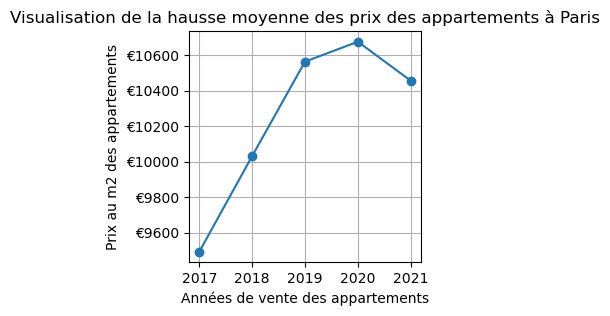

In [12]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(3,3))
plt.plot(df_byyear_appart['date_year'],df_byyear_appart['prix_au_m2'],'o-')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au m2 des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des appartements à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [13]:
#Liste des codes postaux dans nos données.
print('Voici la liste des codes postaux présents dans nos données :')
df_histo_appart[['code_postal']].drop_duplicates()
#df_histo_appart['code_postal'].unique()

Voici la liste des codes postaux présents dans nos données :


,code_postal
0,75003
1,75008
4,75001
478,75006
479,75005
483,75007
1072,75010
1074,75009
1579,75011
1581,75012


In [14]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_bydistrict = df_histo_appart[['date_mutation','valeur_fonciere','code_postal','surface_reelle','prix_au_m2']]
df_bydistrict['date_mutation'] = df_bydistrict['date_mutation'].dt.year
df_bydistrict.rename(columns={"date_mutation": "date_year"},inplace=True)
df_bydistrict = df_bydistrict.groupby(['code_postal','date_year']).mean()
df_bydistrict

valeur_fonciere  surface_reelle    prix_au_m2
code_postal date_year                                               
75001       2017         530392.410096       45.241379  11762.706289
            2018         581390.365711       46.010204  12621.226146
            2019         454606.244889       34.307692  13269.256149
            2020         601204.893337       44.871429  13405.991820
            2021         639321.076138       47.777778  13379.498578
75002       2017         470308.377404       43.093023  10920.126562
            2018         411782.833733       36.398551  11309.461297
            2019         482756.596919       39.651852  12150.543211
            2020         481732.581795       39.503876  12181.589810
            2021         457519.161573       38.866667  11773.445419
75003       2017         445875.081014       38.152047  11679.818729
            2018         515538.311878       41.323864  12469.997687
            2019         554133.088891       43.236686  12813.403980
            2020         555395.396148       43.215385  12834.313205
            2021         511715.566295       40.413043  12660.546567
75004       2017         507122.253579       40.935185  12407.227522
            2018         555545.308511       41.291667  13431.886791
            2019         627199.797995       45.957627  13641.494658
            2020         605801.578393       46.178218  13104.738603
            2021         564595.115633       43.673267  12936.958334
75005       2017         440921.988442       39.048077  11306.752404
            2018         454114.994221       37.823529  12056.438160
            2019         487728.947036       37.634286  12928.383859
            2020         420616.185653       32.414286  12959.757302
            2021         499492.770573       39.639706  12605.843983
75006       2017         582541.649040       46.616162  12508.837036
            2018         690174.509086       53.748571  12896.276640
            2019         677444.406705       50.634146  13378.073631
            2020         755259.928108       54.666667  13807.087614
            2021         709572.165435       51.342857  13795.048958
75007       2017         745605.082852       62.847826  11845.118831
            2018         707752.329353       56.579710  12553.177030
            2019         674806.706073       52.266234  12921.892652
            2020         745561.630224       56.908046  13109.829386
            2021         735736.291571       56.111111  13118.135985
75008       2017         707016.403153       69.748428  10132.798372
            2018         698295.013905       65.707143  10631.299183
            2019         775888.326181       69.360544  11195.449314
            2020         760612.848912       65.023529  11702.927736
            2021         721599.120466       61.670103  11710.094574
75009       2017         457244.887149       47.722772   9582.311203
            2018         460802.406540       45.347826  10187.210521
            2019         493540.963574       45.072539  10957.783651
            2020         516759.514593       47.108434  10981.242522
            2021         491604.856125       45.763393  10732.184387
75010       2017         357132.743976       40.806202   8747.004273
            2018         398706.056243       42.753304   9328.031275
            2019         389450.387612       38.969231   9999.125882
            2020         407332.232036       39.946602  10200.332358
            2021         396104.529354       39.481884  10043.466941
75011       2017         342397.016464       37.453488   9137.783721
            2018         344785.564292       35.605985   9688.945219
            2019         372932.214824       35.948403  10376.908666
            2020         381312.560538       36.148607  10533.071590
            2021         386920.077583       37.396226  10351.644701
75012       2017         322781.841056       38.177686   8454.848964
            2018     

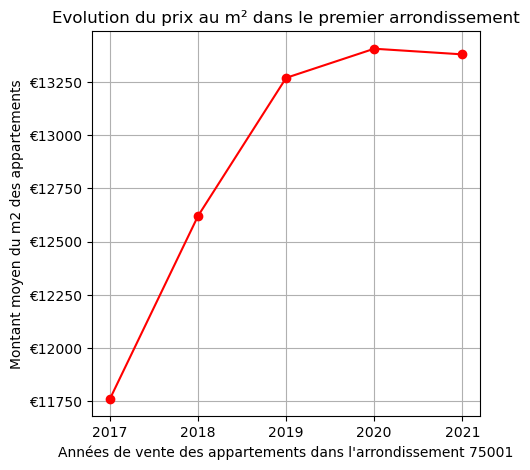

In [15]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(5,5))
plt.plot(['2017','2018','2019','2020','2021'],df_bydistrict.loc[75001, 'prix_au_m2'],'o-',color='red')
plt.xlabel("Années de vente des appartements dans l'arrondissement 75001")
plt.ylabel('Montant moyen du m2 des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

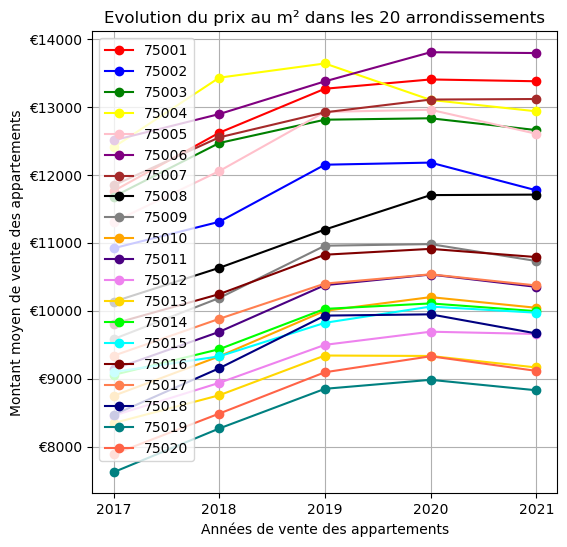

In [16]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(6,6))
interval_historique=['2017','2018','2019','2020','2021']

#Insérer les lignes à tracer ci-dessous
plt.plot(interval_historique,df_bydistrict.loc[75001, 'prix_au_m2'],'o-',color='red',label='75001')
plt.plot(interval_historique,df_bydistrict.loc[75002, 'prix_au_m2'],'o-',color='blue',label='75002')
plt.plot(interval_historique,df_bydistrict.loc[75003, 'prix_au_m2'],'o-',color='green',label='75003')
plt.plot(interval_historique,df_bydistrict.loc[75004, 'prix_au_m2'],'o-',color='yellow',label='75004')
plt.plot(interval_historique,df_bydistrict.loc[75005, 'prix_au_m2'],'o-',color='pink',label='75005')
plt.plot(interval_historique,df_bydistrict.loc[75006, 'prix_au_m2'],'o-',color='purple',label='75006')
plt.plot(interval_historique,df_bydistrict.loc[75007, 'prix_au_m2'],'o-',color='brown',label='75007')
plt.plot(interval_historique,df_bydistrict.loc[75008, 'prix_au_m2'],'o-',color='black',label='75008')
plt.plot(interval_historique,df_bydistrict.loc[75009, 'prix_au_m2'],'o-',color='grey',label='75009')
plt.plot(interval_historique,df_bydistrict.loc[75010, 'prix_au_m2'],'o-',color='orange',label='75010')
plt.plot(interval_historique,df_bydistrict.loc[75011, 'prix_au_m2'],'o-',color='indigo',label='75011')
plt.plot(interval_historique,df_bydistrict.loc[75012, 'prix_au_m2'],'o-',color='violet',label='75012')
plt.plot(interval_historique,df_bydistrict.loc[75013, 'prix_au_m2'],'o-',color='gold',label='75013')
plt.plot(interval_historique,df_bydistrict.loc[75014, 'prix_au_m2'],'o-',color='lime',label='75014')
plt.plot(interval_historique,df_bydistrict.loc[75015, 'prix_au_m2'],'o-',color='aqua',label='75015')
plt.plot(interval_historique,df_bydistrict.loc[75016, 'prix_au_m2'],'o-',color='maroon',label='75016')
plt.plot(interval_historique,df_bydistrict.loc[75017, 'prix_au_m2'],'o-',color='coral',label='75017')
plt.plot(interval_historique,df_bydistrict.loc[75018, 'prix_au_m2'],'o-',color='navy',label='75018')
plt.plot(interval_historique,df_bydistrict.loc[75019, 'prix_au_m2'],'o-',color='teal',label='75019')
plt.plot(interval_historique,df_bydistrict.loc[75020, 'prix_au_m2'],'o-',color='tomato',label='75020')
#Autre solution au 'label'/legend permettant plus de visibilité = plt.text('2021',df_bydistrict.loc[(75001, 2021), 'prix_au_m2'],s=75001,color='red')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe globalement que le prix moyen du m2 augmente de manière linéaire entre 2017 & 2019, puis cette augmentation marque un ralentissement entre 2019 & 2020, avant d'observer une diminution entre 2020 & 2021.

### 7. Prix au metre carré par transaction dans un arrondissement

In [17]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
print('Le nombre total de transactions dans le 6e arrondissement est de {} transactions.'.format(df_histo_appart.loc[df_histo_appart['code_postal']==75006].shape[0]))
print("Le prix moyen du m2 dans le 6e arrondissement est de {}€ sur l'ensemble des transactions.".format(df_histo_appart.loc[df_histo_appart['code_postal']==75006]['prix_au_m2'].mean()))
print("Le prix minimum du m2 dans le 6e arrondissement est de {}€.".format(df_histo_appart.loc[df_histo_appart['code_postal']==75006]['prix_au_m2'].min()))
print("Le prix maximum du m2 dans le 6e arrondissement est de {}€.".format(df_histo_appart.loc[df_histo_appart['code_postal']==75006]['prix_au_m2'].max()))

Le nombre total de transactions dans le 6e arrondissement est de 709 transactions.
Le prix moyen du m2 dans le 6e arrondissement est de 13143.507481693297€ sur l'ensemble des transactions.
Le prix minimum du m2 dans le 6e arrondissement est de 12065.237671232882€.
Le prix maximum du m2 dans le 6e arrondissement est de 14169.817123287667€.


Affichons l'historique des transactions pour visualiser la dispersion des données :

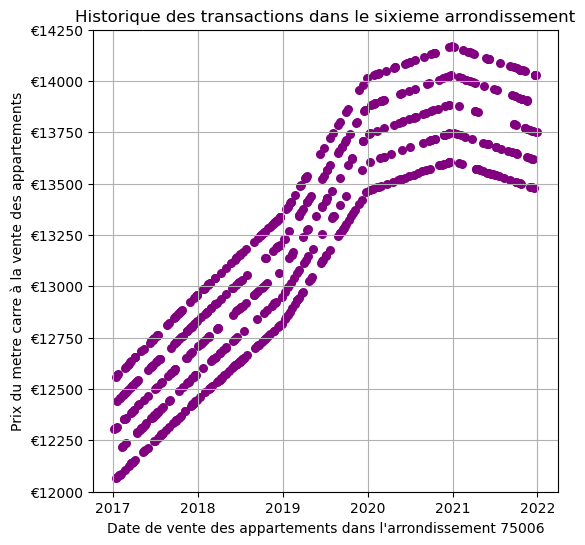

In [18]:
cp=75006
plt.figure(figsize=(6,6))

#Insérer ci-dessous le scatter plot
plt.scatter(df_histo_appart.loc[df_histo_appart['code_postal']==cp]['date_mutation'],df_histo_appart.loc[df_histo_appart['code_postal']==cp]['prix_au_m2'],s=30,c='purple')
plt.xlabel("Date de vente des appartements dans l'arrondissement 75006")
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(12000,14250)
# ou plt.ylim(df_histo_appart.loc[df_histo_appart['code_postal']==75006]['prix_au_m2'].min(),df_histo_appart.loc[df_histo_appart['code_postal']==75006]['prix_au_m2'].max())
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()


On observe également grâce au scatter plot, que le nuage de points suit sensiblement la même variation que les courbes que l'on a pu visualiser précédemment, soit une nette augmentation du prix au m2 entre 2017 & 2019, puis un ralentissement de cette augmentation sur l'année 2020 avant une diminution du prix au m2 sur l'année 2021. 

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [19]:
#On calcule la corrélation de Pearson
from scipy import stats

stats.pearsonr((df_histo_appart.loc[df_histo_appart['code_postal']==cp]['date_mutation'].astype('int64'))
               , df_histo_appart.loc[df_histo_appart['code_postal']==cp]['prix_au_m2'])


PearsonRResult(statistic=0.903844603149148, pvalue=7.108378962568753e-263)

Le coefficient de corrélation est de 0.903844603149148 avec une pvalue de 7.108378962568753e-263 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [20]:
stats.pearsonr((df_histo_appart.loc[df_histo_appart['code_postal']==cp]['valeur_fonciere'])
               , df_histo_appart.loc[df_histo_appart['code_postal']==cp]['surface_reelle'])

PearsonRResult(statistic=0.9977572898250296, pvalue=0.0)

Le coefficient de corrélation est de 0.9977572898250296 avec une pvalue de 0.0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [21]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_histo_locaux=df_histo.drop(columns=['adresse_numero','adresse_nom_voie','code_type_local','nom_commune'])[df_histo['code_type_local']==4]
df_histo_locaux.head(2)

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_au_m2
18,2017-02-01,3.113277e+06,75003,Local industriel. commercial ou assimilé,250,12453.109192
29,2017-02-17,1.164375e+06,75003,Local industriel. commercial ou assimilé,95,12256.581685


In [22]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_byyear_locaux=df_histo_locaux[['date_mutation', 'surface_reelle','valeur_fonciere','prix_au_m2']].groupby(df_histo_locaux.date_mutation.dt.year).mean(numeric_only = True)
df_byyear_locaux

,surface_reelle,valeur_fonciere,prix_au_m2
date_mutation,,,
2017,89.991404,9.654594e+05,10949.909217
2018,88.096866,1.003463e+06,11569.499180
2019,82.826389,9.928222e+05,11960.132050
2020,85.630952,1.034380e+06,11966.470204
2021,92.832000,1.129357e+06,12006.488691


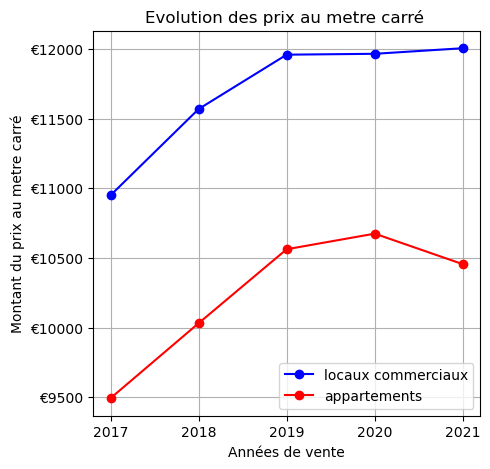

In [23]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(5,5))
plt.plot(['2017','2018','2019','2020','2021'],df_byyear_locaux['prix_au_m2'],'o-',label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],df_byyear_appart['prix_au_m2'],'o-',label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au mètre carré des locaux commerciaux est supérieur au prix au mètre carré des appartements. De plus, malgré un ralentissement à partir de 2019, le prix moyen du mètre carré des locaux commerciaux continue à augmenter sur l'intégralité de la période, contrairement à celui des appartements (qui diminue à partir de 2020).

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- La surface du bien immobilier
- La date considérée 
- La localisation (code_postal)
- Le type de bien

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [24]:
df_histo.head(2)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_au_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877


In [25]:
df_histo_encode=df_histo.join(pd.get_dummies(df_histo['code_postal'], dtype='int'))
df_histo_encode=df_histo_encode.join(pd.get_dummies(df_histo['type_local']))
df_histo_encode.head(2)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_au_m2,75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
df_histo_encode['timestamp']=df_histo_encode['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9
df_histo_encode.head(2)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_au_m2,75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.483402e+09
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.484179e+09


In [27]:
df_histo_encode.drop(['date_mutation','code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','prix_au_m2'],axis='columns',inplace=True)
df_histo_encode.head(2)

,valeur_fonciere,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,5.505597e+05,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.483402e+09
1,1.576492e+06,163,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.484179e+09


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [28]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split

# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = train_test_split(
     df_histo_encode[['surface_reelle',75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,'Appartement','Local industriel. commercial ou assimilé','timestamp']]
    ,df_histo_encode['valeur_fonciere']
    ,test_size=0.33
    ,random_state=90)

In [29]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [30]:
from sklearn.linear_model import LinearRegression

regr_lin=LinearRegression().fit(X_train,y_train)
y_predict_lin=regr_lin.predict(X_test)
print( "Erreur moyenne sur la prédiction de la valeur foncière : {} %".format(((np.mean(abs(y_test-y_predict_lin)/y_test))*100).round(2)))

Erreur moyenne sur la prédiction de la valeur foncière : 8.78 %


Notre algorithme fait donc 8,78 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :

- La demande client étant d'obtenir un pourcentage de moins de 10% d'erreur moyenne sur l'algorithme, le "contrat" est rempli.
- Cependant ce pourcentage reste conséquent et peut être un signe d'underfitting (= sous-entrainement) du modèle.
- Il peut être nécessaire d'ajuster le modèle pour avoir une prédiction plus fiable, en spécifiant par exemple quelles rues sont les plus demandées...
- Il pourrait être intéressant d'essayer un autre modèle (régression linéaire Lasso par exemple) afin d'essayer d'améliorer la précision des prédictions

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [31]:
#On importe les données dans un dataframe
df_port_actifs = pd.read_excel(r"portefeuille_actifs+(3).xlsx")
display(df_port_actifs.head(2))
df_port_actifs.info()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [32]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
df_port_actifs_encode=df_port_actifs.join(pd.get_dummies(df_port_actifs['code_postal'], dtype='int'))
df_port_actifs_encode=df_port_actifs_encode.join(pd.get_dummies(df_port_actifs['type_local']))
df_port_actifs_encode.head(2)

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
date = '2022-12-31'
df_port_actifs_encode['date'] = date
df_port_actifs_encode['timestamp']=df_port_actifs_encode['date'].astype('datetime64[s]').astype('int64') / 10**9
df_port_actifs_encode.head(2)

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,date,timestamp
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2022-12-31,1.672445e+09
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2022-12-31,1.672445e+09


In [34]:
df_port_actifs_encode.drop(['code_type_local','code_postal','type_local','adresse_numero','adresse_nom_voie','code_commune','surface_carrez','nombre_pieces_principales','longitude','latitude','nom_commune','date'],axis='columns',inplace=True)
df_port_actifs_encode.rename(columns={"surface_reelle_bati": "surface_reelle"},inplace=True)
df_port_actifs_encode.head(2)

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.672445e+09
1,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.672445e+09


In [35]:
#Conversion du dataframe en str
X_test_bis = df_port_actifs_encode
X_test_bis.columns = X_test_bis.columns.astype(str)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [36]:
#On effectue la prédiction
y_predict_lin_bis = regr_lin.predict(X_test_bis)
#On vérifie les 10 premières valeurs
print(y_predict_lin_bis[:10])

[444899.0053425  372648.68324257 817992.07285482 875978.94316017
 337424.14641978 472062.84560488 393362.32927105 638454.81959531
 150936.78079301 148059.28298369]


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [37]:
df_port_actifs_encode['value_prediction'] = y_predict_lin_bis.tolist()
df_port_actifs_encode.head(2)

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,75010,75011,75012,75013,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp,value_prediction
0,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.672445e+09,444899.005343
1,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.672445e+09,372648.683243


In [38]:
#Valorisation du portefeuille sur le segment des particuliers
print('La valorisation du segment particulier est de {} (en millions deuros).'.format(df_port_actifs_encode.loc[df_port_actifs_encode['Appartement']==1]['value_prediction'].sum()/1000000))

La valorisation du segment particulier est de 71.09024565404331 (en millions deuros).


In [39]:
#Valorisation du portefeuille sur le segment corporate
print('La valorisation du segment professionnel est de {} (en millions deuros).'.format(df_port_actifs_encode.loc[df_port_actifs_encode['Local industriel. commercial ou assimilé']==1]['value_prediction'].sum()/1000000))

La valorisation du segment professionnel est de 98.22437248822062 (en millions deuros).


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Le segment corporate a une valorisation plus importante que le segment particuliers
- L'erreur moyenne sur le modèle (8,78% obtenue précédemment) reste conséquente
- La valorisation est effectuée sur une seule année (pas d'historique), on ne voit donc pas l'évolution des prix dans le passé et n'avons pas de visibilité les évènements pouvant intervenir et modifier cette estimation dans l'avenir.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [40]:
#On importe les données dans un dataframe
df_echantillon = pd.read_excel(r"echantillon_a_classer2.xlsx")
display(df_echantillon.head(2))
df_echantillon.info()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   valeur_fonciere  40 non-null     float64
 1   code_postal      40 non-null     int64  
 2   nom_commune      40 non-null     object 
 3   surface_reelle   40 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [41]:
df_echantillon["prix_au_m2"] = ((df_echantillon['valeur_fonciere'] / df_echantillon['surface_reelle']))
df_echantillon = df_echantillon.drop(columns=['valeur_fonciere','surface_reelle','nom_commune'])
df_echantillon.head(2)

,code_postal,prix_au_m2
0,75019,9871.444128
1,75019,10045.572493


In [42]:
print("Le prix au m2 minimum de l'échantillon est de {} €.".format(df_echantillon["prix_au_m2"].min()))
print("Le prix au m2 maximum de l'échantillon est de {} €.".format(df_echantillon["prix_au_m2"].max()))
print("Le prix au m2 moyen de l'échantillon est de {} €.".format(df_echantillon["prix_au_m2"].mean()))

Le prix au m2 minimum de l'échantillon est de 7207.217630136972 €.
Le prix au m2 maximum de l'échantillon est de 10113.195821917805 €.
Le prix au m2 moyen de l'échantillon est de 8607.849851904111 €.


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init=10,random_state=0).fit(df_echantillon)

In [44]:
# On vérifie les données de la prédiction
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
display(labels)
display(centroids)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

array([[75019.        ,  9806.92467429],
       [75019.        ,  7408.77502952]])

In [45]:
df_echantillon['labels'] = labels.tolist()
df_echantillon['labels'] = df_echantillon['labels'].replace([0, 1], ['Local industriel. commercial ou assimilé','Appartement'])
display(df_echantillon.head())


print("Le label 'Appartement' regroupe {} biens, soit {}% de l'échantillon.".format((df_echantillon['labels'].loc[df_echantillon['labels']=='Appartement'].count()),((df_echantillon['labels'].loc[df_echantillon['labels']=='Appartement'].count()/df_echantillon['labels'].count())*100)))
print("Le label 'Local industriel. commercial ou assimilé' regroupe {} biens, soit {}% de l'échantillon.".format(df_echantillon['labels'].loc[df_echantillon['labels']=='Local industriel. commercial ou assimilé'].count(),((df_echantillon['labels'].loc[df_echantillon['labels']=='Local industriel. commercial ou assimilé'].count()/df_echantillon['labels'].count())*100)))

df_centroids = pd.DataFrame(centroids, columns = ['code_postal','centroids'])
df_centroids["code_postal"] = df_centroids["code_postal"].astype('int64')
df_centroids.head()

,code_postal,prix_au_m2,labels
0,75019,9871.444128,Local industriel. commercial ou assimilé
1,75019,10045.572493,Local industriel. commercial ou assimilé
2,75019,9194.697790,Local industriel. commercial ou assimilé
3,75019,9469.142168,Local industriel. commercial ou assimilé
4,75019,7463.610005,Appartement


Le label 'Appartement' regroupe 20 biens, soit 50.0% de l'échantillon.
Le label 'Local industriel. commercial ou assimilé' regroupe 20 biens, soit 50.0% de l'échantillon.


,code_postal,centroids
0,75019,9806.924674
1,75019,7408.775030


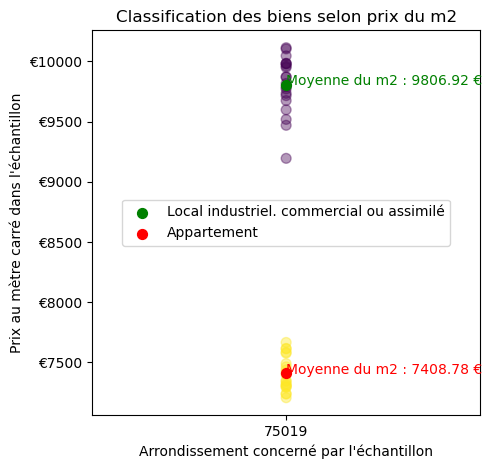

In [46]:
#On affiche les résultats
plt.figure(figsize=(5,5))
plt.scatter(df_echantillon['code_postal'], df_echantillon['prix_au_m2'],c=labels, s=50, alpha=0.4)
plt.scatter(df_centroids.loc[0,'code_postal'], df_centroids.loc[0,'centroids'], c='green', s=50, label = "Local industriel. commercial ou assimilé")
plt.scatter(df_centroids.loc[1,'code_postal'], df_centroids.loc[1,'centroids'], c='red', s=50, label = "Appartement")
plt.xlabel("Arrondissement concerné par l'échantillon")
plt.ylabel("Prix au mètre carré dans l'échantillon")
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend(loc='center')
plt.xticks(np.arange(75019, 75020, step=1))
plt.title('Classification des biens selon prix du m2')
plt.text(75019,df_centroids.loc[1,'centroids'],s="Moyenne du m2 : {} €".format(df_centroids.loc[1,'centroids'].round(2)),color='red')
plt.text(75019,df_centroids.loc[0,'centroids'],s="Moyenne du m2 : {} €".format(df_centroids.loc[0,'centroids'].round(2)),color='green')
plt.show()

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :

Sur l'échantillon transmis, l'analyse des résultats obtenus grâce à l'algorithme permet de distinguer 2 clusters de tailles équivalentes avec des centroïds bien distincts. Nous pouvons ainsi déterminer aisément quel bien appartient à quel segment.

Il existe cependant des limites à l'exercice puisque l'algorithme 'k-means':
- ne prend en compte que les variables numériques
- ne peut déterminer automatiquement le nombre optimal de clusters
- les résultats obtenus peuvent pêtre différents en fonction de l'ordonnancement des données et du nombre d'itérations imposées

On parle donc ici d'un algorithme 'non-déterministe' qui trouvera une approximation de solution plutôt qu'une solution exacte.